# Recurrent Neural networks

### Vectorization - One-hot encoding or word embeding?

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are many ways we could do that:

* We could pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices), then use as the first layer in our network a layer capable of handling such integer tensors (the Embedding layer, which we will cover in detail later in the book).
* We could one-hot-encode our lists to turn them into vectors of 0s and 1s. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as the first layer in our network a Dense layer, capable of handling floating-point vector data.

During lab 2 we used the following solution (no need to run it now):

In [ ]:
# import numpy as np
 
# def vectorize_sequences(sequences, dimension=10000):
#     # Create an all-zero matrix of shape (len(sequences), dimension)
#     results = np.zeros((len(sequences), dimension))
#     for i, sequence in enumerate(sequences):
#         results[i, sequence] = 1.  # set specific indices of results[i] to 1s
#     return results
 
# # Our vectorized training data
# x_train = vectorize_sequences(train_data)
# # Our vectorized test data
# x_test = vectorize_sequences(test_data)
# # Vectorize labels
# y_train = np.asarray(train_labels).astype('float32')
# y_test = np.asarray(test_labels).astype('float32')

 Alternatively to the two solutions above, we could use a techniqe called word embeding. It is much more sophisticated method. Mapping words into dictionaries, that we explained before, is usefull only to a certain degree. It treats each word separately and only realy assess the text by checking if a word (or a combination of words) exists. It does not understand the meaning of a word. Furthermore, simmilar words are treated as a separate entries in a dictionary (for example 'run', 'runs', 'running' will be 3 different words). We can use some pre-processing to cut prefixes and suffixes, but it will only work for some words.

What the word embedding tries to achieve is parametrise the meaning of the words - for example map if they are a noun or a verb, assess the tense or a gender, or even specify some more complex categories like object, animal, vehicle etc. What we have to do is specify how many of those parameters we want and then we place each word in an n-dimensional space related to each parameter. Again, the beauty of the neural networks comes from the fact, that we do not need to specify what those parameters are - maybe for one problem we would need to differ if the word is a noun or a verb, and for other problem if it is a dog or cat breed. The network will learn all of it during training. Simmilar to ConvNet filters, we only need to decide how many parameters we want in our Embedding layer. If the embedding is large, the network will better understand nuances between words. But if it is too large, it will compute slow and can lead to overfitting. You probably already noticed some similarities. 

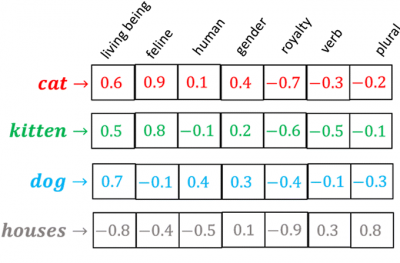

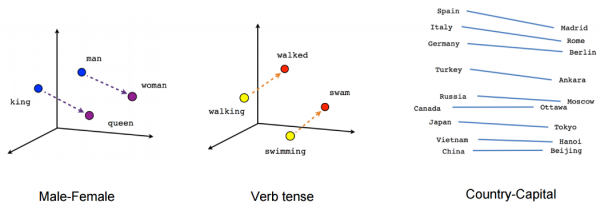

### Introduction to RNN

 Recurrent Neural Network is a generalization of a feedforward neural network that has internal memory. RNN is recurrent in nature as it performs the same function for every input of data while the output of the current input depends on the past one computation. After producing the output, it is copied and sent back into the recurrent network. For making a decision, it considers the current input and the output that it has learned from the previous input.

Unlike feedforward neural networks, RNNs can use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. In other neural networks all the inputs are independent of each other, but in RNN all the inputs are related to each other.

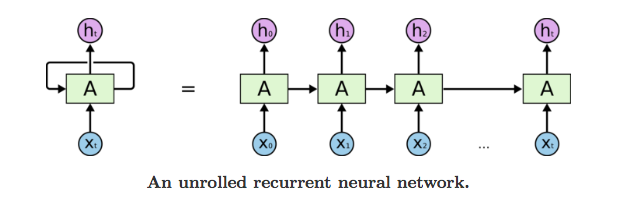

Recurrent networks take as their input not just the current input example they see, but also what they have perceived previously in time. Here’s a diagram of an early, simple recurrent net proposed by Elman, where the BTSXPE at the bottom of the drawing represents the input example in the current moment, and CONTEXT UNIT represents the output of the previous moment.

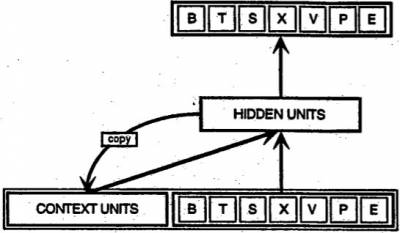

Return_sequences

Like all recurrent layers in Keras, SimpleRNN can be run in two different modes: it can return either the full sequences of successive outputs for each timestep (a 3D tensor of shape (batch_size, timesteps, output_features)), or it can return only the last output for each input sequence (a 2D tensor of shape (batch_size, output_features)). These two modes are controlled by the return_sequences constructor argument. 

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN
 
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Stacking multiple layers

It is sometimes useful to stack several recurrent layers one after the other in order to increase the representational power of a network. In such a setup, you have to get all intermediate layers to return full sequences. In the following example we put together 4 SimpleRNN layers, the last one without parameter return_sequences=True as it only returns the last outputs).

Model summary:

### Training a simple RNN

Task 1: Let's train a simple recurrent network using an Embedding layer and a SimpleRNN layer. We will use the IMDB movie review classification problem to try the RNN models. First, let's preprocess the data: 

In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
 
#Import IMDB dataset:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=10000)
 
#Pad sequences:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=500)
input_test = sequence.pad_sequences(input_test, maxlen=500)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


 Architecture:

* Embedding layer (max_features=10000, 32)
* One or more SimpleRNN - 32
* Dense layer with one neuron and sigmoid activation

Compile:

* rmsprop optimizer,
* binary_crossentropy loss function,
* accuracy metrics.

Train:

* epochs=10,
* batch_size=128,
* validation_split=0.2


In [9]:
#TODO: Implement the architecture, compile and train the model
from tensorflow.keras.layers import Dense
model = Sequential() # input_shape=(25000, 500)
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [10]:
import keras
optimizerRMSprop = keras.optimizers.RMSprop() # learning_rate=1e-4
model.compile(optimizer=optimizerRMSprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [11]:
history = model.fit(
      x=input_train,
      y=y_train,
      batch_size=128,
      epochs=10,
      # validation_data=validation_generator,
      validation_split=0.2)

Epoch 1/10


157/157 [==============================] - 18s 108ms/step - loss: 0.6955 - accuracy: 0.5107 - val_loss: 0.6927 - val_accuracy: 0.5206
Epoch 2/10
157/157 [==============================] - 17s 105ms/step - loss: 0.6828 - accuracy: 0.5634 - val_loss: 0.6817 - val_accuracy: 0.5666
Epoch 3/10
157/157 [==============================] - 16s 102ms/step - loss: 0.6405 - accuracy: 0.6676 - val_loss: 0.6145 - val_accuracy: 0.7136
Epoch 4/10
157/157 [==============================] - 16s 99ms/step - loss: 0.5734 - accuracy: 0.7447 - val_loss: 0.5570 - val_accuracy: 0.7696
Epoch 5/10
157/157 [==============================] - 15s 97ms/step - loss: 0.5229 - accuracy: 0.7867 - val_loss: 0.5283 - val_accuracy: 0.7574
Epoch 6/10
157/157 [==============================] - 15s 96ms/step - loss: 0.5010 - accuracy: 0.7847 - val_loss: 0.4921 - val_accuracy: 0.7816
Epoch 7/10
157/157 [==============================] - 16s 101ms/step - loss: 0.4570 - accuracy: 0.8162 - val_loss: 0.4498 - val_accuracy: 0.8212

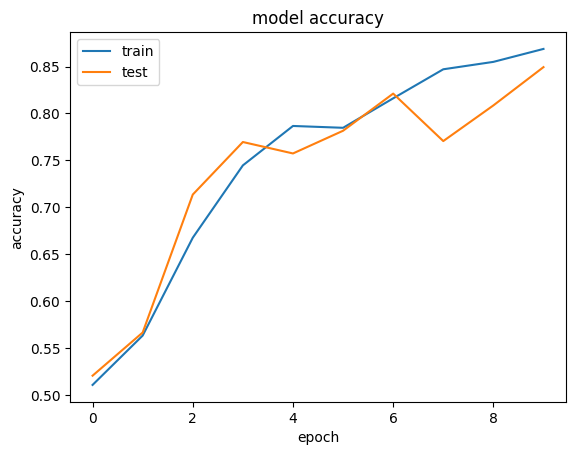

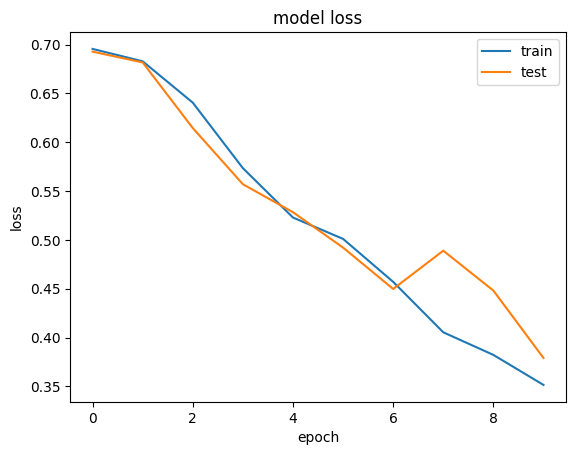

In [13]:
from matplotlib import pyplot as plt
history_dict = history.history
history_dict.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

## LSTM layers

Long Short-Term Memory (LSTM) networks are a modified version of recurrent neural networks, which makes it easier to remember past data in memory. The vanishing gradient problem of RNN is resolved here. LSTM is well-suited to classify, process and predict time series given time lags of unknown duration. It trains the model by using back-propagation. In an LSTM network, three gates are present: 

![1 MwU5yk8f9d6IcLybvGgNxA.jpg](<attachment:1 MwU5yk8f9d6IcLybvGgNxA.jpg>)
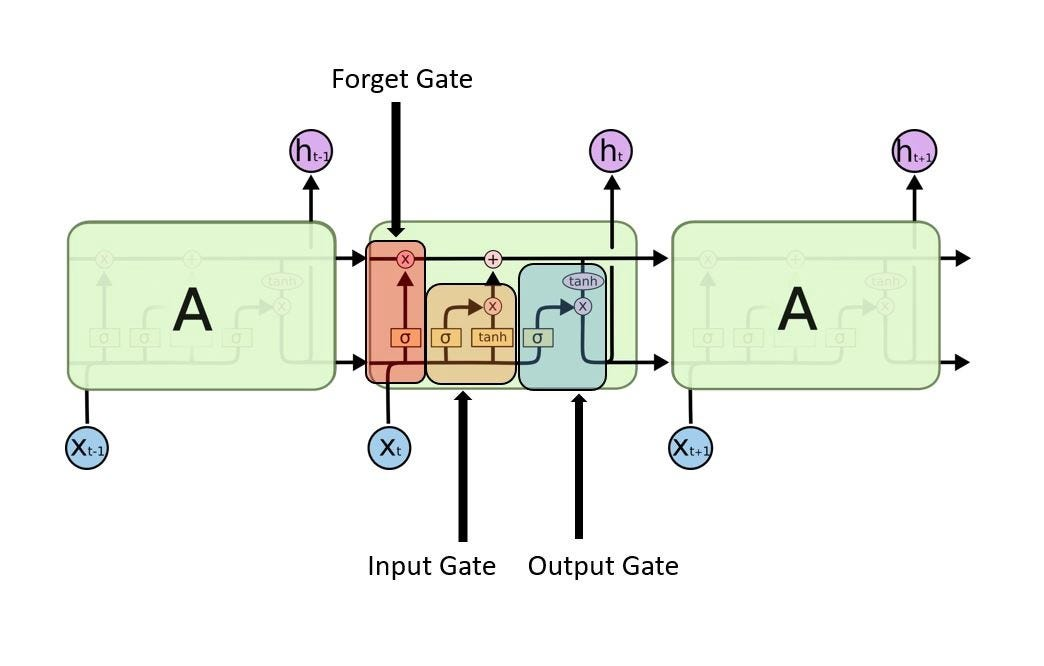

 Task 2: Now let's set up a model using a LSTM layer and train it on the IMDB data. The network will be similar to the one with SimpleRNN that you just implemented. We only specify the output dimensionality of the LSTM layer, and leave every other argument (there are lots) to the Keras defaults.

Architecture:

* Embedding layer - 10000, 32
* LSTM - 32
* Dense layer with one output and sigmoid activation

Compile:

* optimizer='rmsprop',
* loss='binary_crossentropy',
* metrics=['acc'].

Train:

* epochs=10,
* batch_size=128,
* validation_split=0.2


In [14]:
#TODO: Implement the architecture, compile and train the model
from tensorflow.keras.layers import LSTM
model = Sequential() # input_shape=(25000, 500)
model.add(Embedding(10000, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
import keras
optimizerRMSprop = keras.optimizers.RMSprop() # learning_rate=1e-4
model.compile(optimizer=optimizerRMSprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [16]:
history = model.fit(
      x=input_train,
      y=y_train,
      batch_size=128,
      epochs=10,
      # validation_data=validation_generator,
      validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 47s 284ms/step - loss: 0.6919 - accuracy: 0.5677 - val_loss: 0.6899 - val_accuracy: 0.6318
Epoch 2/10
157/157 [==============================] - 44s 279ms/step - loss: 0.6786 - accuracy: 0.6935 - val_loss: 0.6228 - val_accuracy: 0.7356
Epoch 3/10
157/157 [==============================] - 43s 274ms/step - loss: 0.5759 - accuracy: 0.7516 - val_loss: 0.5382 - val_accuracy: 0.7952
Epoch 4/10
157/157 [==============================] - 43s 273ms/step - loss: 0.5056 - accuracy: 0.8119 - val_loss: 0.5782 - val_accuracy: 0.6804
Epoch 5/10
157/157 [==============================] - 42s 270ms/step - loss: 0.4359 - accuracy: 0.8431 - val_loss: 0.4506 - val_accuracy: 0.8044
Epoch 6/10
157/157 [==============================] - 42s 270ms/step - loss: 0.3771 - accuracy: 0.8692 - val_loss: 0.3894 - val_accuracy: 0.8564
Epoch 7/10
157/157 [==============================] - 43s 276ms/step - loss: 0.3324 - accuracy: 0.8883 - val_loss: 0.3657 - val_ac

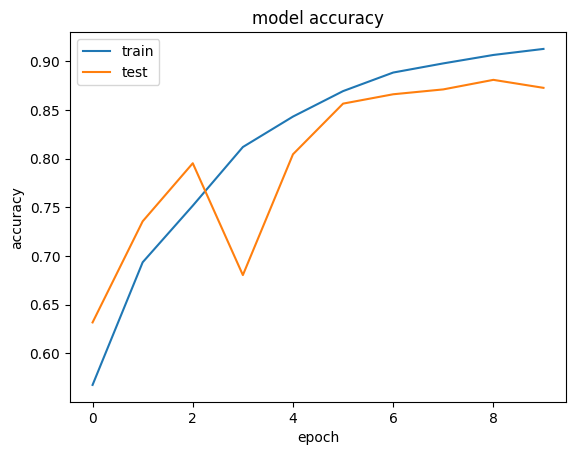

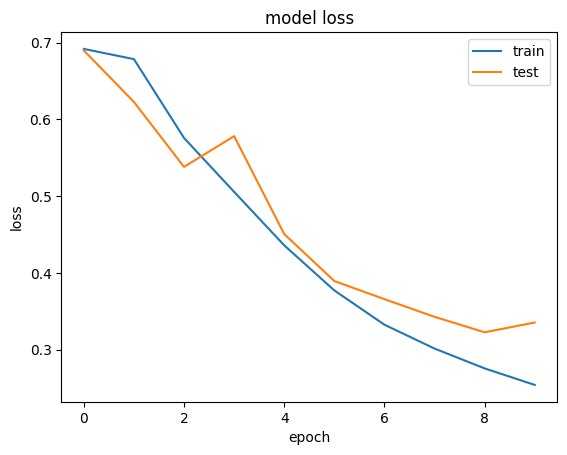

In [17]:
history_dict = history.history
history_dict.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [4]:
#TODO: Implement the architecture, compile and train the model
from tensorflow.keras.layers import Dense
model = Sequential() # input_shape=(25000, 500)
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-tr

In [5]:
import keras
optimizerRMSprop = keras.optimizers.RMSprop() # learning_rate=1e-4
model.compile(optimizer=optimizerRMSprop,
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [6]:
history = model.fit(
      x=input_train,
      y=y_train,
      batch_size=128,
      epochs=10,
      # validation_data=validation_generator,
      validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 45s 271ms/step - loss: 0.6360 - accuracy: 0.6028 - val_loss: 0.5959 - val_accuracy: 0.7144
Epoch 2/10
157/157 [==============================] - 42s 266ms/step - loss: 0.3736 - accuracy: 0.8426 - val_loss: 0.4364 - val_accuracy: 0.8314
Epoch 3/10
157/157 [==============================] - 42s 267ms/step - loss: 0.2917 - accuracy: 0.8846 - val_loss: 0.3679 - val_accuracy: 0.8444
Epoch 4/10
157/157 [==============================] - 42s 266ms/step - loss: 0.1972 - accuracy: 0.9270 - val_loss: 0.4448 - val_accuracy: 0.8216
Epoch 5/10
157/157 [==============================] - 42s 265ms/step - loss: 0.1225 - accuracy: 0.9564 - val_loss: 0.5535 - val_accuracy: 0.8044
Epoch 6/10
157/157 [==============================] - 42s 265ms/step - loss: 0.0714 - accuracy: 0.9759 - val_loss: 0.6333 - val_accuracy: 0.8056
Epoch 7/10
157/157 [==============================] - 42s 266ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.7638 - val_ac

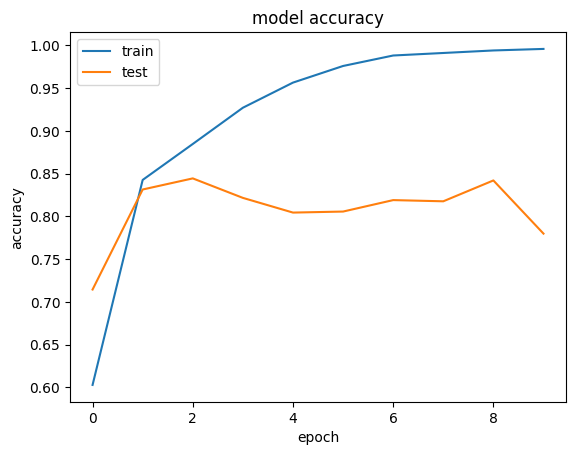

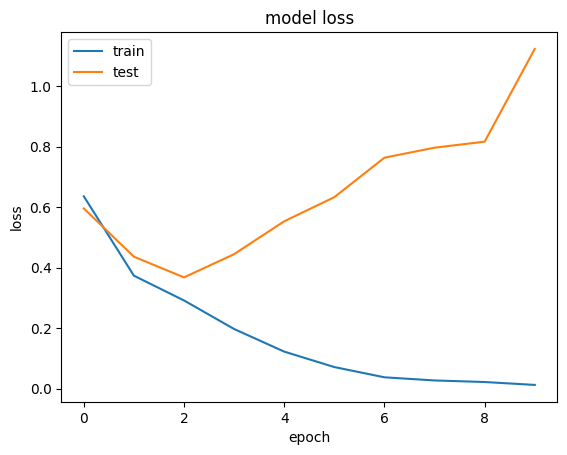

In [8]:
from matplotlib import pyplot as plt
history_dict = history.history
history_dict.keys()

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()